<a href="https://colab.research.google.com/github/POPE001/Drug-Crime-London/blob/main/GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import folium



In [ ]:
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/MPS Monthly Crime Dashboard_BoroughSNT_TNOCrimeDatafy22-23_03.csv')
df.head(10)


Month_Year Area Type              Borough_SNT                Area name  \
0  2022-04-01   Borough  Aviation Security(SO18)  Aviation Security(SO18)   
1  2022-04-01   Borough  Aviation Security(SO18)  Aviation Security(SO18)   
2  2022-04-01   Borough  Aviation Security(SO18)  Aviation Security(SO18)   
3  2022-04-01   Borough  Aviation Security(SO18)  Aviation Security(SO18)   
4  2022-04-01   Borough  Aviation Security(SO18)  Aviation Security(SO18)   
5  2022-04-01   Borough  Aviation Security(SO18)  Aviation Security(SO18)   
6  2022-04-01   Borough  Aviation Security(SO18)  Aviation Security(SO18)   
7  2022-04-01   Borough  Aviation Security(SO18)  Aviation Security(SO18)   
8  2022-04-01   Borough  Aviation Security(SO18)  Aviation Security(SO18)   
9  2022-04-01   Borough  Aviation Security(SO18)  Aviation Security(SO18)   

  Area code                         Offence Group  \
0      SO18             Arson and Criminal Damage   
1      SO18             Arson and Criminal Damage   
2      SO18                              Burglary   
3      SO18                              Burglary   
4      SO18                         Drug Offences   
5      SO18  Miscellaneous Crimes Against Society   
6      SO18  Miscellaneous Crimes Against Society   
7      SO18  Miscellaneous Crimes Against Society   
8      SO18  Miscellaneous Crimes Against Society   
9      SO18  Miscellaneous Crimes Against Society   

                                    Offence Subgroup   Measure Financial Year  \
0                                    Criminal Damage  Offences        fy22-23   
1                                    Criminal Damage  Outcomes        fy22-23   
2                    Burglary Business and Community  Offences        fy22-23   
3                    Burglary Business and Community  Outcomes        fy22-23   
4                                Possession of Drugs  Offences        fy22-23   
5  Disclosure, Obstruction, False or Misleading S...  Outcomes        fy22-23   
6  Making, Supplying or Possessing Articles for u...  Offences        fy22-23   
7  Making, Supplying or Possessing Articles for u...  Outcomes        fy22-23   
8                          Other Notifiable Offences  Offences        fy22-23   
9                          Other Notifiable Offences  Outcomes        fy22-23   

   FY_FYIndex  Count  
0  fy22-23_03      8  
1  fy22-23_03      1  
2  fy22-23_03      1  
3  fy22-23_03      1  
4  fy22-23_03      2  
5  fy22-23_03      1  
6  fy22-23_03      1  
7  fy22-23_03      1  
8  fy22-23_03    104  
9  fy22-23_03      3

In [ ]:
#  'geojson_file' contains the geojson data for London boroughs
geojson_file = '/content/drive/MyDrive/london_boroughs.geojson'


In [ ]:
# Load geojson data
london_geo = folium.GeoJson(geojson_file)


In [ ]:
# Convert the 'Month_Year' column to datetime format
df['Month_Year'] = pd.to_datetime(df['Month_Year'])


In [ ]:
# Extract year, month, and day from the 'Month_Year' column
df['Year'] = df['Month_Year'].dt.year
df['Month'] = df['Month_Year'].dt.month
df['Day'] = df['Month_Year'].dt.day


In [ ]:
# Check for missing values
print(df.isnull().sum())


Month_Year          0
Area Type           0
Borough_SNT         0
Area name           0
Area code           0
Offence Group       0
Offence Subgroup    0
Measure             0
Financial Year      0
FY_FYIndex          0
Count               0
Year                0
Month               0
Day                 0
dtype: int64


In [ ]:
# Group the data by 'Area code' and 'Month' and sum the counts
df_spatial_temporal = df.groupby(['Area code', 'Month']).agg({'Count': 'sum'}).reset_index()


In [ ]:
# Pivot the table to have 'Area code' as rows, 'Month' as columns, and 'Count' as values
df_pivot = df_spatial_temporal.pivot(index='Area code', columns='Month', values='Count').fillna(0)


In [ ]:
# Encode categorical variables if needed
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# categorical_cols = ['Area Type', 'Borough_SNT', 'Area name', 'Area code', 'Offence Group', 'Offence Subgroup', 'Measure']
# df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))


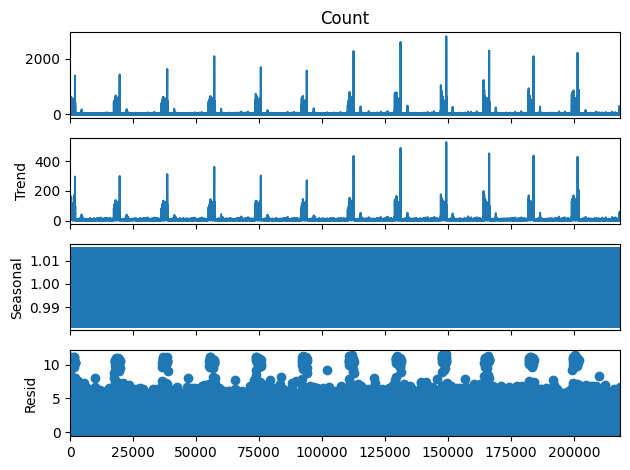

In [ ]:
# Seasonal decomposition
result = seasonal_decompose(df['Count'], model='multiplicative', period=12)
result.plot()
plt.show()


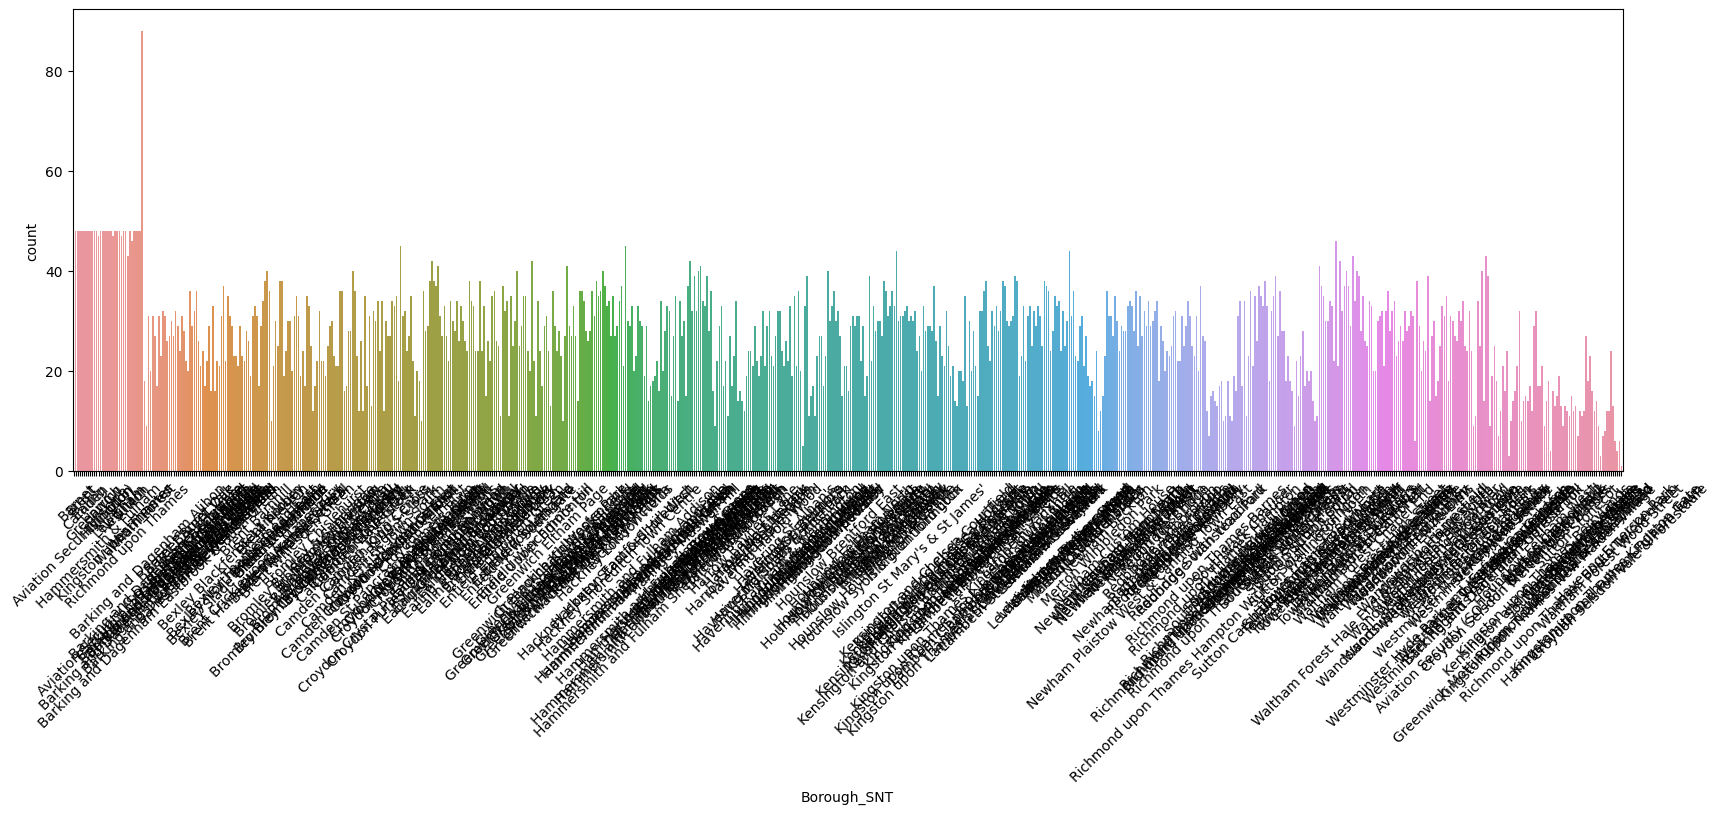

In [ ]:
# Filtering the dataset for drug-related offenses
drug_offences_data = df[df['Offence Group'] == 'Drug Offences']

# Visualize the distribution of drug-related crimes across different Boroughs/SNTs
plt.figure(figsize=(20,6))
ax = sns.countplot(data=drug_offences_data, x='Borough_SNT')
plt.xticks(rotation=45)

# Display every nth label
n = 2  # Choose n as per your requirement
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % n == 0:  # keep every nth label
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.show()


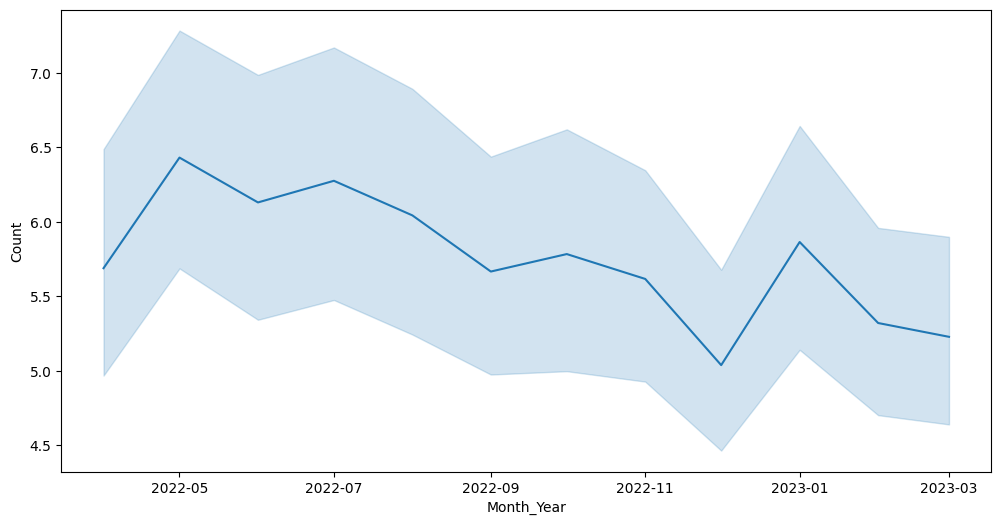

In [ ]:
# Visualize temporal trends of drug-related crimes
plt.figure(figsize=(12,6))
sns.lineplot(data=drug_offences_data, x='Month_Year', y='Count')
plt.show()


<ipython-input-15-0433a87d3a61>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_offences_data['Month_Year'] = pd.to_datetime(drug_offences_data['Month_Year'])


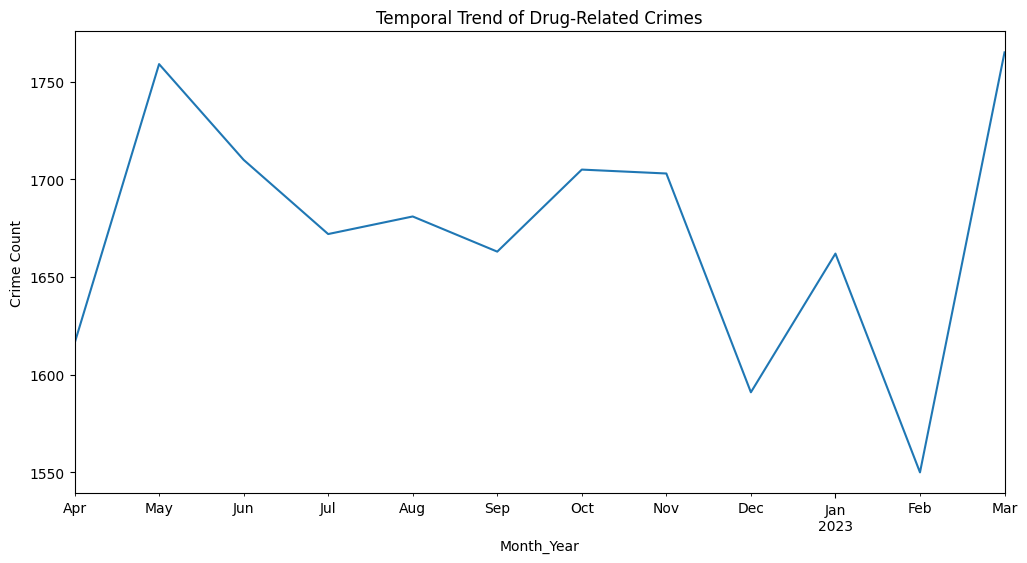

In [ ]:
# Temporal Trend of Drug-Related Crimes
plt.figure(figsize=(12,6))

# Check if 'Month_Year' is not in columns, indicating it is the index
if 'Month_Year' not in drug_offences_data.columns:
    # If 'Month_Year' is already the index, just create a copy of the DataFrame
    drug_offences_data_copy = drug_offences_data.copy()
else:
    # Otherwise, convert 'Month_Year' to datetime, set it as index, and create a copy
    drug_offences_data['Month_Year'] = pd.to_datetime(drug_offences_data['Month_Year'])
    drug_offences_data.set_index('Month_Year', inplace=True)
    drug_offences_data_copy = drug_offences_data.copy()

# Resampling the data by month and plotting the trend
drug_offences_data_copy.resample('M').size().plot()
plt.title('Temporal Trend of Drug-Related Crimes')
plt.ylabel('Crime Count')
plt.show()


In [ ]:
# Extract Month and Year from Date
drug_offences_data['Month'] = drug_offences_data.index.month
drug_offences_data['Year'] = drug_offences_data.index.year

# Encode Categorical Variables (like Borough_SNT)
drug_offences_data = pd.get_dummies(drug_offences_data, columns=['Borough_SNT'], drop_first=True)


<ipython-input-16-25daf3c494dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_offences_data['Month'] = drug_offences_data.index.month
<ipython-input-16-25daf3c494dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_offences_data['Year'] = drug_offences_data.index.year


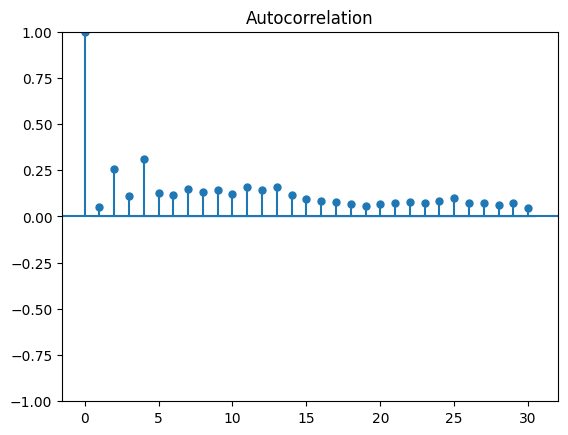

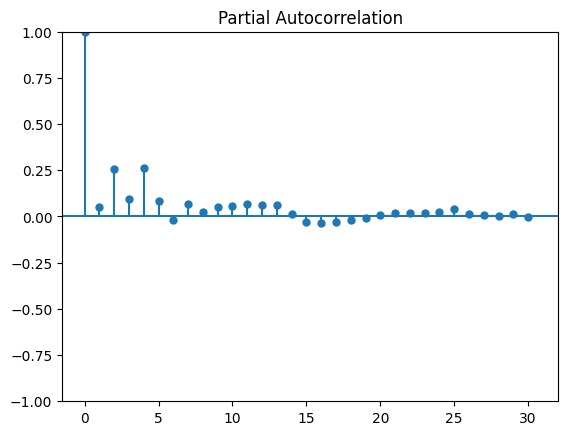

In [ ]:
# Autocorrelation and Partial Autocorrelation Analysis
plot_acf(df['Count'], lags=30)
plt.show()
plot_pacf(df['Count'], lags=30)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit model
model = ARIMA(drug_offences_data.resample('M').size(), order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=3)  # Forecasting for the next 3 months
print(forecast)


2023-04-30    1587.080326
2023-05-31    1690.655923
2023-06-30    1630.359588
Freq: M, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
from sklearn.metrics import mean_absolute_error

# Assuming y_true is the actual number of crimes in the next 3 months
# and forecast is the predicted value from the model.
# Assuming df is your DataFrame containing the actual and predicted values

# Ensure that y_true and forecast are defined in your workspace
# Replace 'actual_column' and 'predicted_column' with the actual column names
# Assuming df is your DataFrame containing the actual and predicted values

# Replace 'true_values_column' with the actual name of the column containing the true observed values
# Replace 'predicted_values_column' with the actual name of the column containing the predicted values

# Check if the columns exist in the DataFrame
if 'Count' in df.columns and 'Count' in df.columns:
    y_true = df['Count']
    forecast = df['Count']

    # Now you can calculate the Mean Absolute Error
    mae = mean_absolute_error(y_true, forecast)
    print(f'Mean Absolute Error: {mae}')
else:
    print("The specified columns do not exist in the DataFrame.")

# Now you can calculate the Mean Absolute Error
mae = mean_absolute_error(y_true, forecast)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.0
Mean Absolute Error: 0.0


In [ ]:
# Prepare X (input) and y (target) for the LSTM model
# Each area code will be a separate sample, and the counts for each month will be the features.
# We'll predict the count for the next month.
# Convert the dataframe to numpy array
data_np = df_pivot.values


In [ ]:
# Define the number of time steps for each input sequence (number of months to consider for prediction)
n_steps = 3


In [ ]:
# Initialize empty lists to store sequences
X, y = [], []


In [ ]:
# Generate sequences
for i in range(len(data_np)):
    end_ix = i + n_steps
    if end_ix > len(data_np)-1:
        break
    seq_x, seq_y = data_np[i:end_ix, :], data_np[end_ix, :]
    X.append(seq_x)
    y.append(seq_y)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Assuming X_train is your preprocessed input features and y_train is your target variable
# Load or prepare your training data

# Build the LSTM model
# Build the LSTM model for spatio-temporal modeling
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, df_pivot.shape[1])))
model.add(Dense(df_pivot.shape[1]))  # Output layer with the same number of features as months
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Epoch 1/50
38/38 [==============================] - 2s 3ms/step - loss: 22067.8418
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 10219.7549
Epoch 3/50
38/38 [==============================] - 0s 3ms/step - loss: 17220.7246
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 20630.1152
Epoch 5/50
38/38 [==============================] - 0s 3ms/step - loss: 14507.6162
Epoch 6/50
38/38 [==============================] - 0s 4ms/step - loss: 10731.8770
Epoch 7/50
38/38 [==============================] - 0s 3ms/step - loss: 13035.8682
Epoch 8/50
38/38 [==============================] - 0s 4ms/step - loss: 17300.1895
Epoch 9/50
38/38 [==============================] - 0s 3ms/step - loss: 12725.3340
Epoch 10/50
38/38 [==============================] - 0s 3ms/step - loss: 10512.0713
Epoch 11/50
38/38 [==============================] - 0s 3ms/step - loss: 10465.2461
Epoch 12/50
38/38 [==============================] - 0s 4ms/step - loss: 7377.6094
Ep

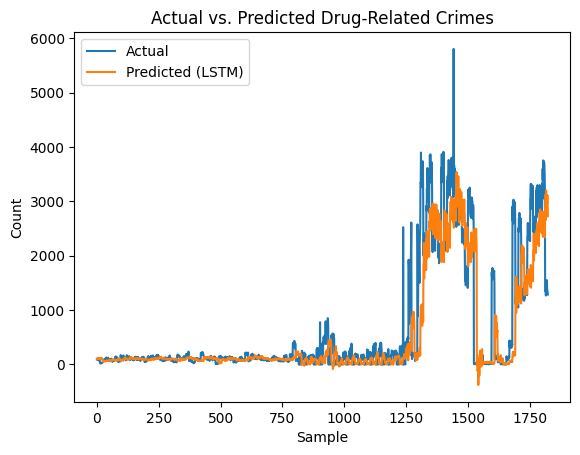

In [ ]:
# Visualize the predictions
plt.plot(y_test.flatten(), label='Actual')
plt.plot(y_pred.flatten(), label='Predicted (LSTM)')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Drug-Related Crimes')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)


Mean Absolute Error: 285.51295327901704
Mean Squared Error: 325117.42051347607
Root Mean Squared Error: 570.1906878522974


In [ ]:
# Reshape y_test and y_pred
y_test_reshaped = y_test.flatten()
y_pred_reshaped = y_pred.flatten()

# Calculate the deviation
deviation = np.abs(y_pred_reshaped - y_test_reshaped)
deviation_threshold = 100
# Identify areas with significant deviation
high_risk_areas = np.where(deviation > deviation_threshold)[0]

#print('High-risk areas (deviation > threshold):', high_risk_areas)

# Assuming 'area_names' is a list containing the names of areas in the same order as the dataset
area_names = df.loc[df['Offence Group'] == 'Drug Offences']['Area name'].unique()

# Filter high-risk areas to only include valid indices
valid_high_risk_areas = [index for index in high_risk_areas if index < len(area_names)]

# Select the names of the high-risk areas
high_risk_area_names = area_names[valid_high_risk_areas]

# Display the names of the high-risk areas
print('High-risk area names:')
for i, area_index in enumerate(valid_high_risk_areas):
    print(f'Index {area_index}: {high_risk_area_names[i]}')


High-risk area names:
Index 370: Cranford
Index 420: Coombe Hill
Index 421: Coombe Vale
Index 422: Green Lane & St James
Index 423: Hook & Chessington North
Index 424: King George's & Sunray
Index 425: Kingston Town Centre
Index 426: Motspur Park & Old Malden East
Index 427: Norbiton
Index 428: Old Malden
Index 429: St Mark's & Seething Wells
Index 430: Surbiton Hill
Index 431: Tolworth
Index 492: Beckton
Index 493: Boleyn
Index 494: Canning Town North
Index 495: Canning Town South
Index 496: Custom House
Index 498: East Ham South
Index 499: Forest Gate North
Index 500: Forest Gate South
Index 502: Green Street West
Index 503: Little Ilford
Index 600: Island Gardens
Index 601: Lansbury
Index 602: Limehouse
Index 605: Shadwell
Index 606: Spitalfields & Banglatown
Index 607: St Dunstan's
Index 608: St Katharine's & Wapping
Index 609: St Peter's
Index 611: Weavers



Analysis for high-risk area: Cranford
Mean drug-related crimes: 2.28
Median drug-related crimes: 2.0
Standard deviation of drug-related crimes: 1.69


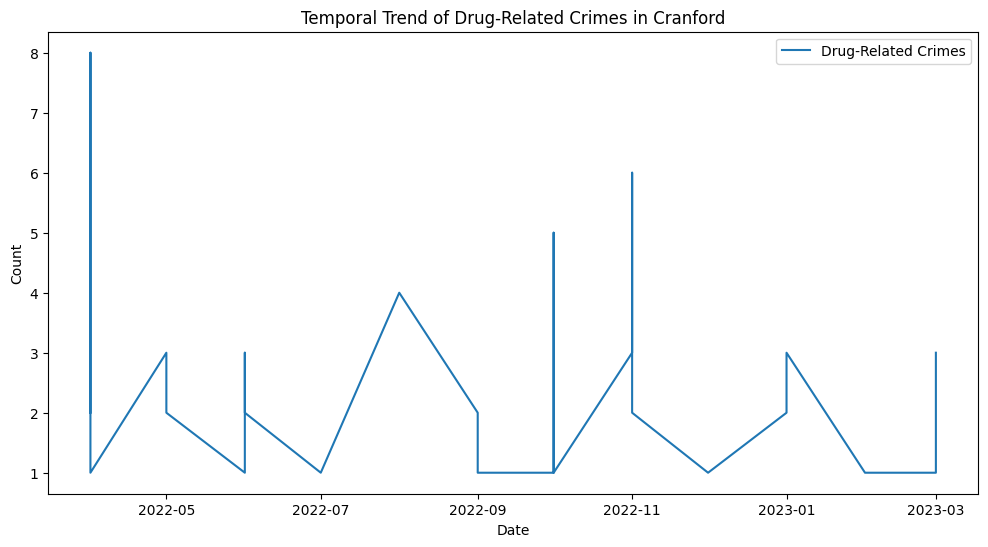


Analysis for high-risk area: Coombe Hill
Mean drug-related crimes: 1.50
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 0.65


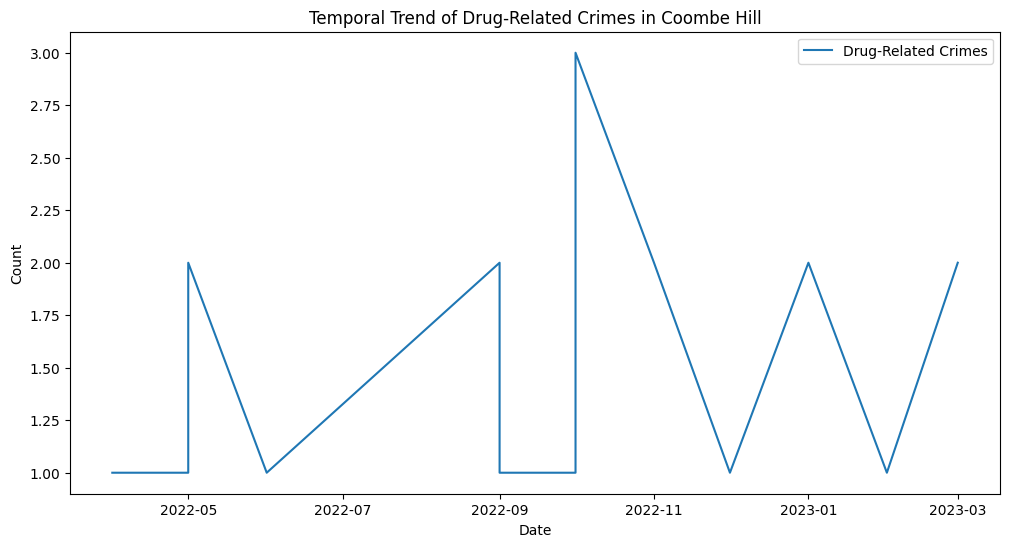


Analysis for high-risk area: Coombe Vale
Mean drug-related crimes: 1.31
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 0.75


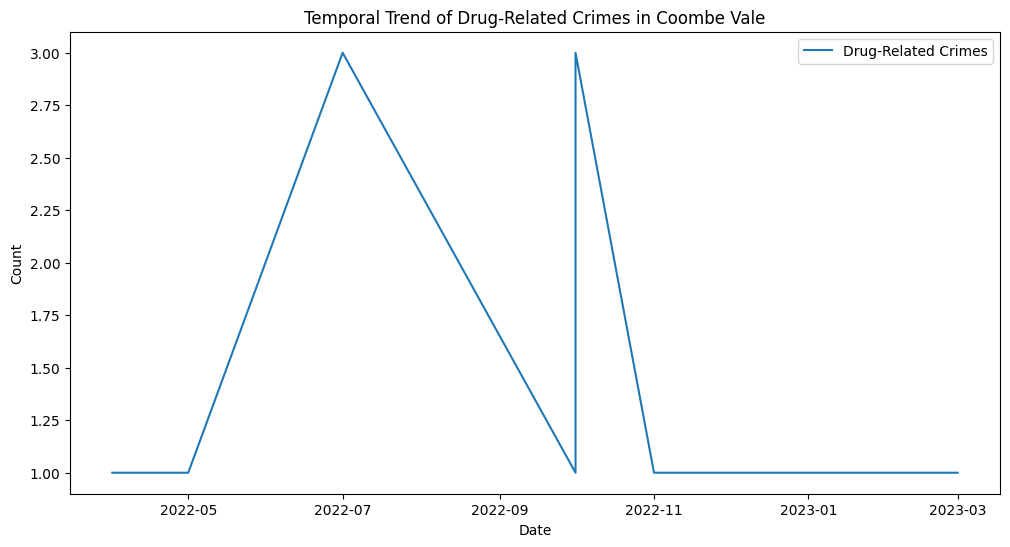


Analysis for high-risk area: Green Lane & St James
Mean drug-related crimes: 1.40
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 0.94


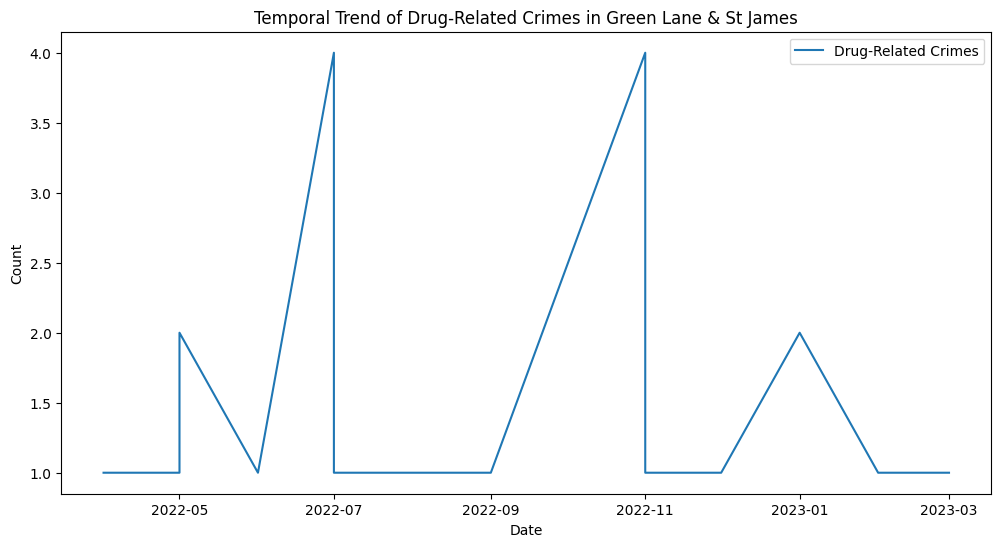


Analysis for high-risk area: Hook & Chessington North
Mean drug-related crimes: 1.30
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 0.66


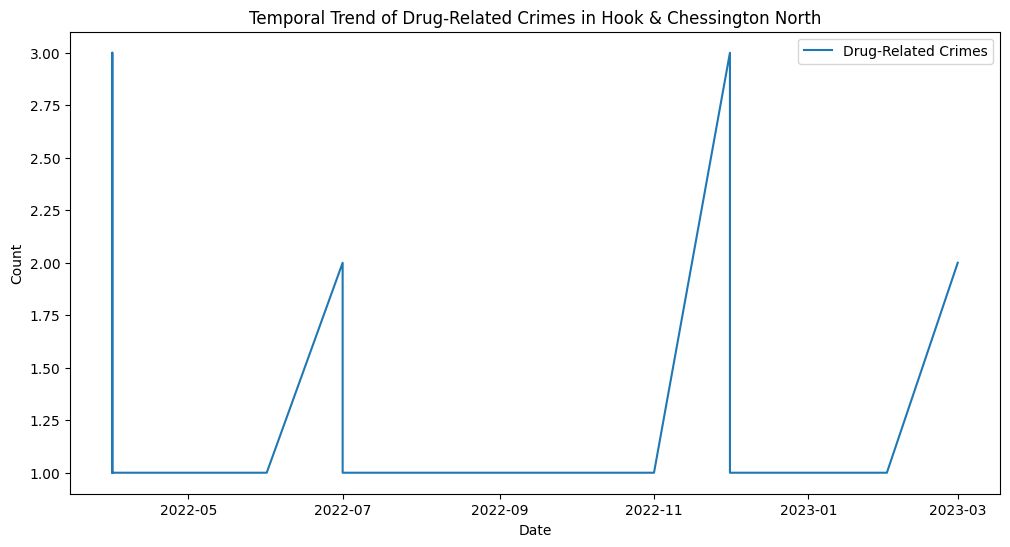


Analysis for high-risk area: King George's & Sunray
Mean drug-related crimes: 1.22
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 0.55


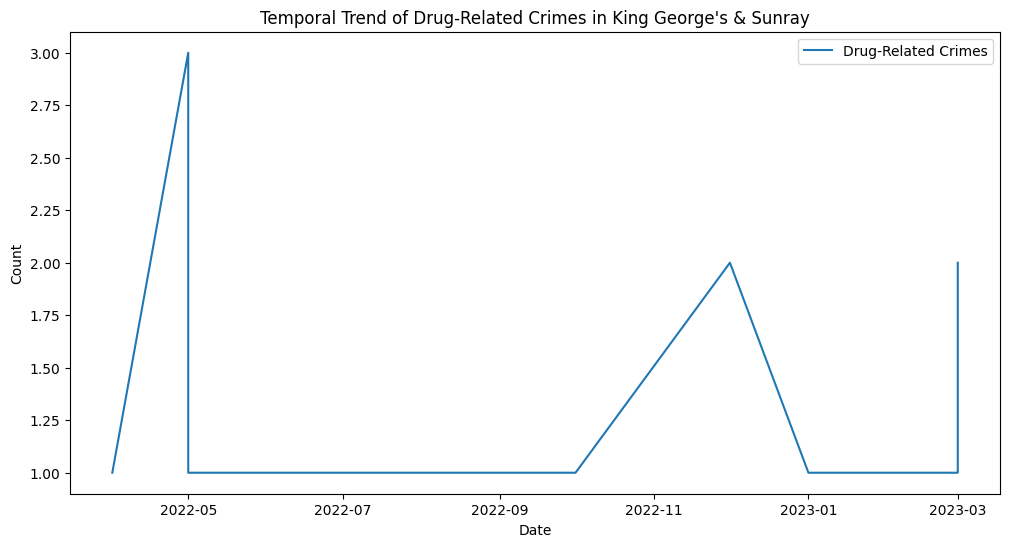


Analysis for high-risk area: Kingston Town Centre
Mean drug-related crimes: 16.23
Median drug-related crimes: 9.0
Standard deviation of drug-related crimes: 16.99


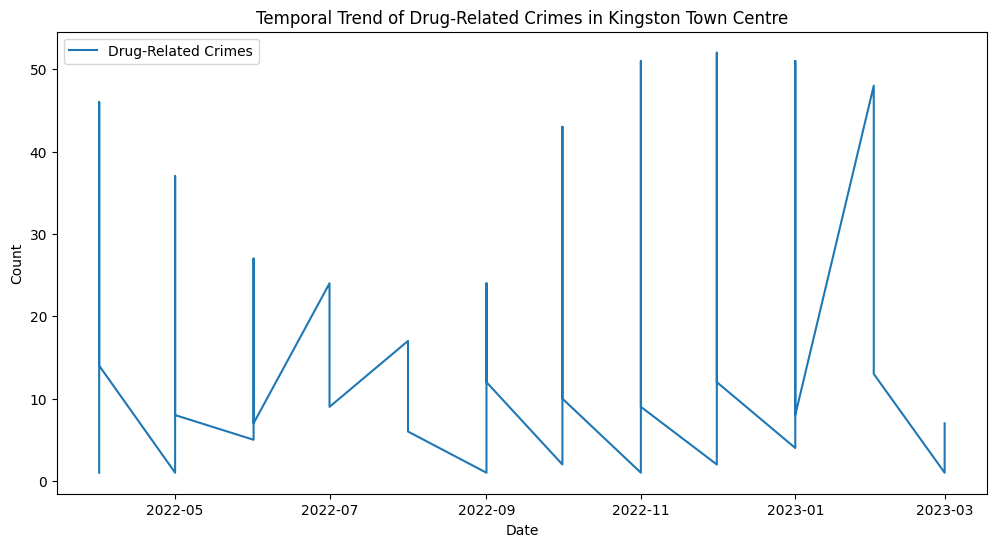


Analysis for high-risk area: Motspur Park & Old Malden East
Mean drug-related crimes: 1.23
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 0.44


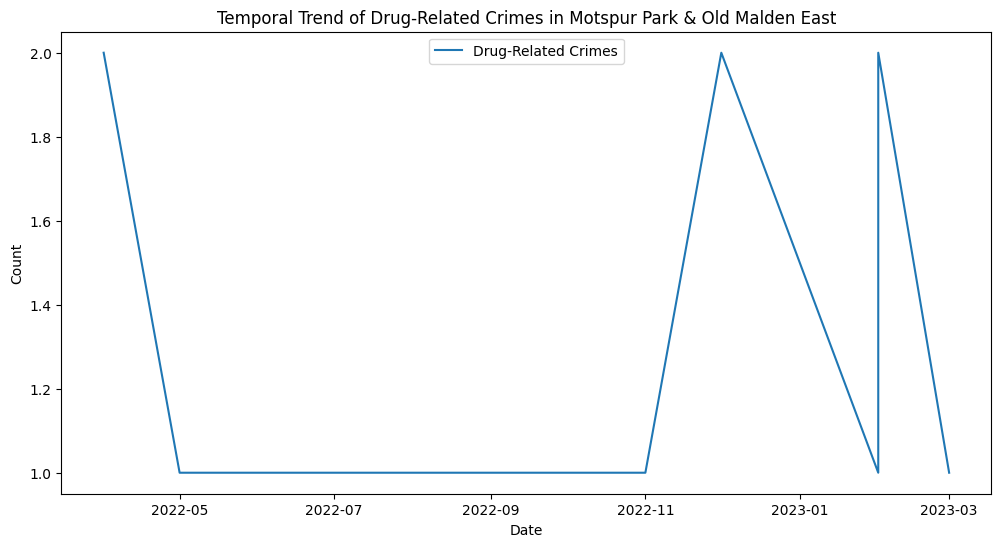


Analysis for high-risk area: Norbiton
Mean drug-related crimes: 2.13
Median drug-related crimes: 2.0
Standard deviation of drug-related crimes: 1.25


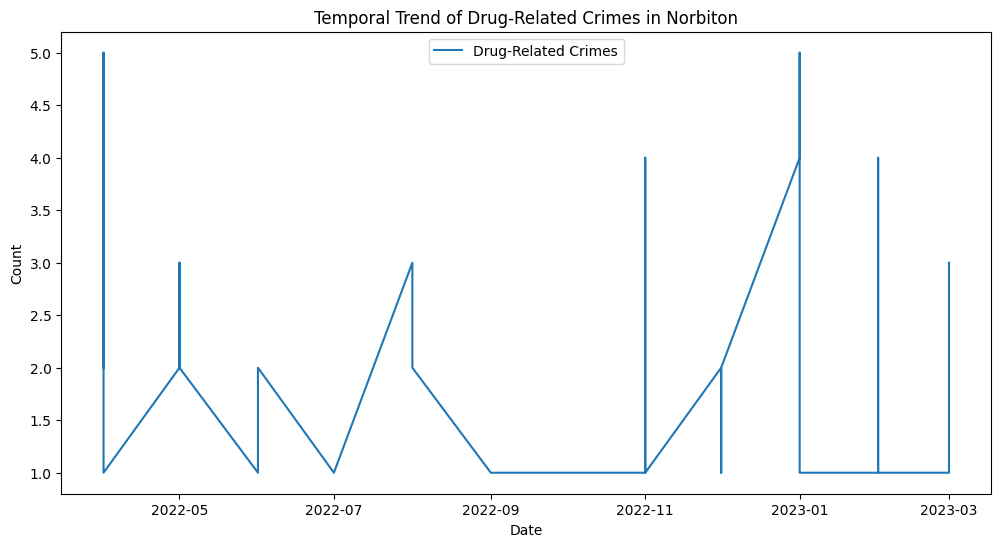


Analysis for high-risk area: Old Malden
Mean drug-related crimes: 1.75
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 1.16


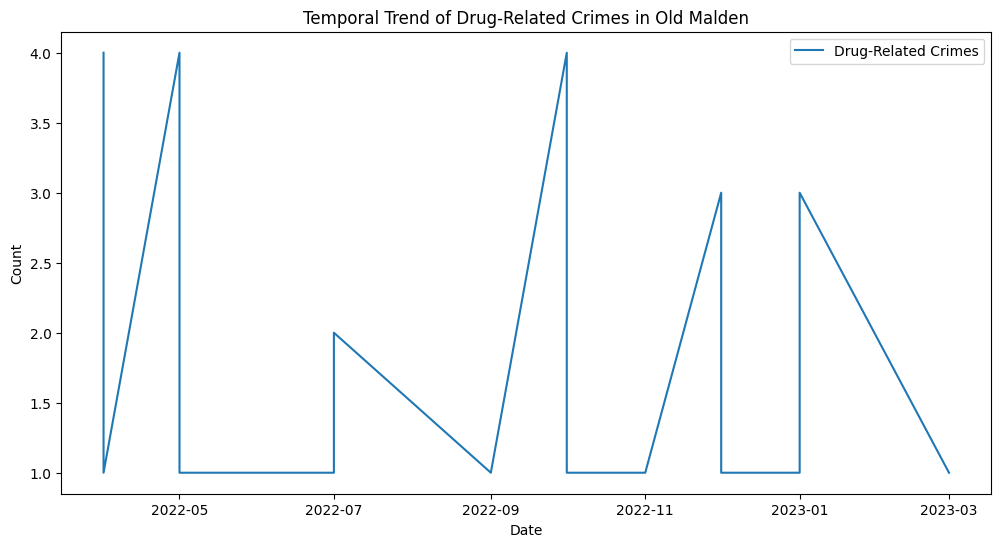


Analysis for high-risk area: St Mark's & Seething Wells
Mean drug-related crimes: 1.89
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 1.83


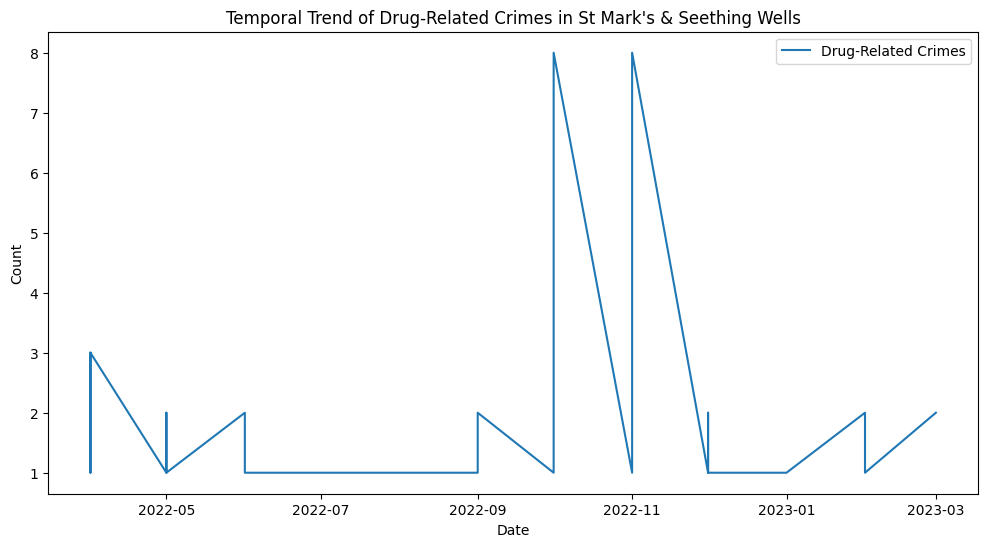


Analysis for high-risk area: Surbiton Hill
Mean drug-related crimes: 1.24
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 0.54


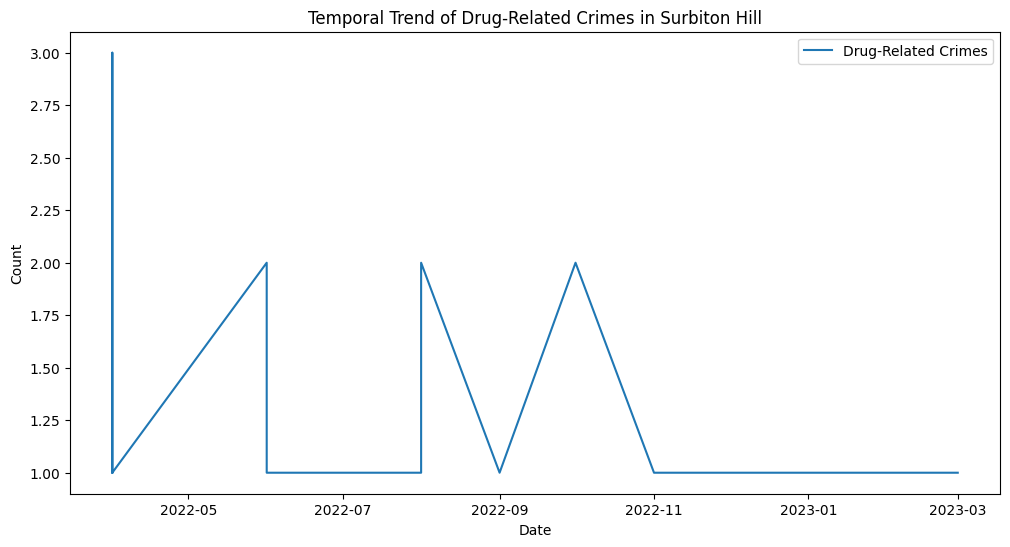


Analysis for high-risk area: Tolworth
Mean drug-related crimes: 1.87
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 1.64


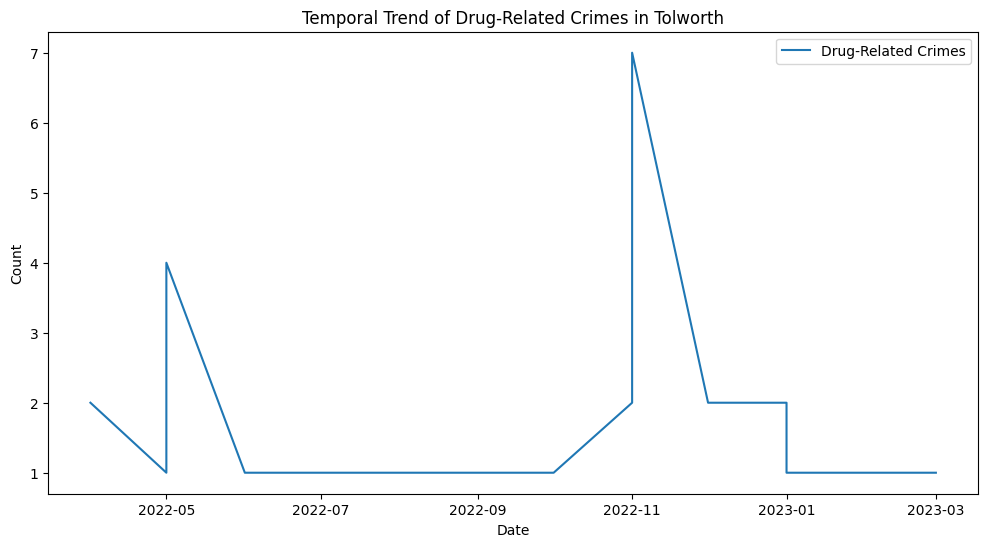


Analysis for high-risk area: Beckton
Mean drug-related crimes: 4.17
Median drug-related crimes: 3.0
Standard deviation of drug-related crimes: 3.48


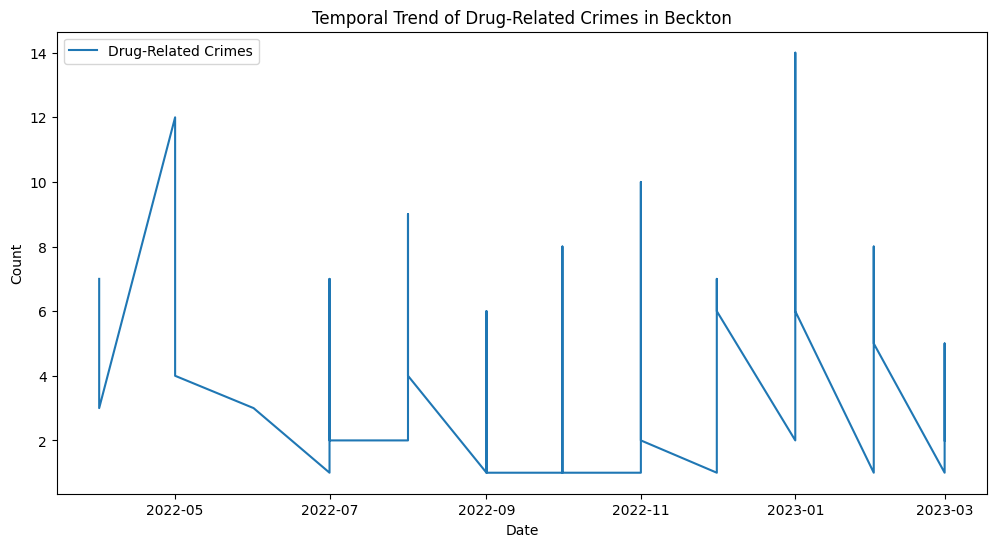


Analysis for high-risk area: Boleyn
Mean drug-related crimes: 3.00
Median drug-related crimes: 2.0
Standard deviation of drug-related crimes: 2.22


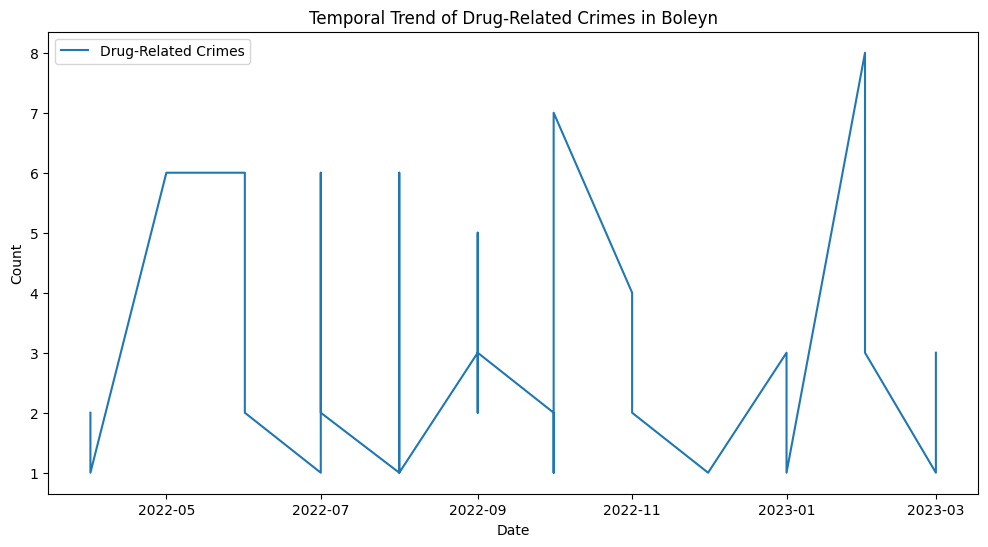


Analysis for high-risk area: Canning Town North
Mean drug-related crimes: 3.55
Median drug-related crimes: 3.0
Standard deviation of drug-related crimes: 2.78


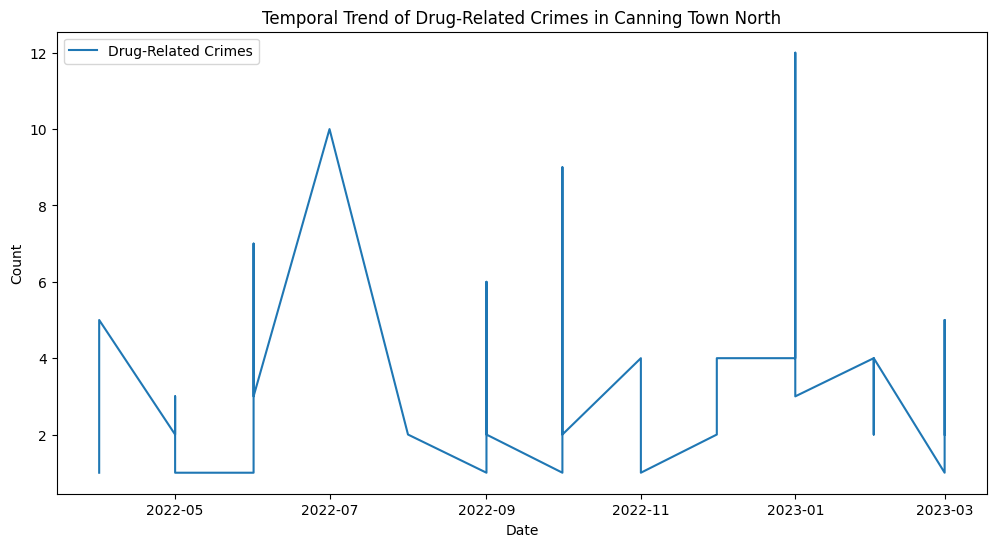


Analysis for high-risk area: Canning Town South
Mean drug-related crimes: 2.04
Median drug-related crimes: 2.0
Standard deviation of drug-related crimes: 1.45


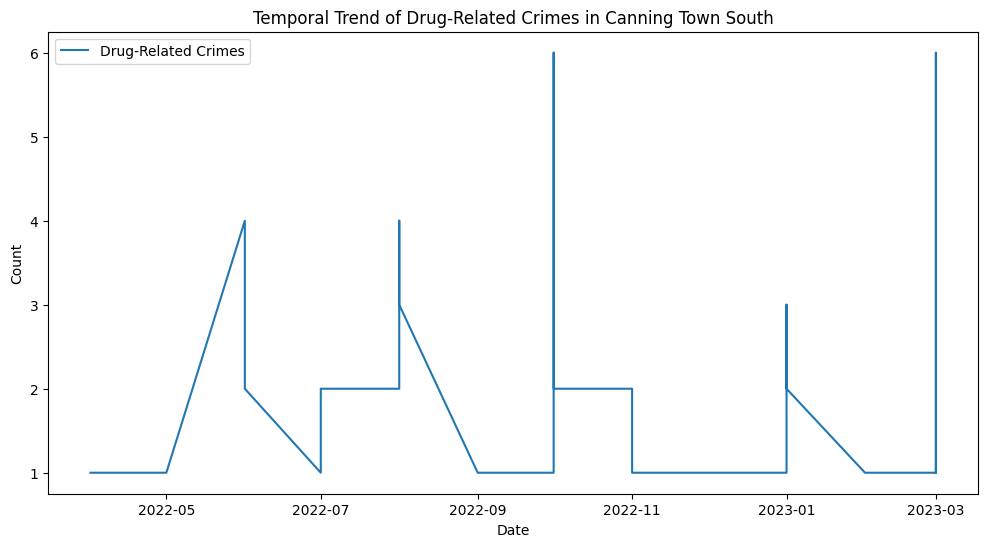


Analysis for high-risk area: Custom House
Mean drug-related crimes: 2.71
Median drug-related crimes: 2.0
Standard deviation of drug-related crimes: 2.12


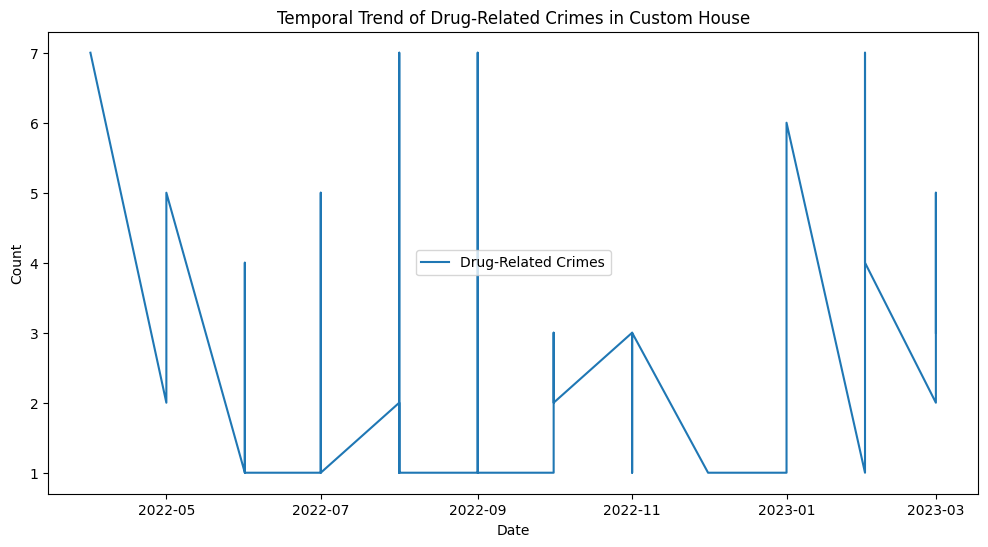


Analysis for high-risk area: East Ham South
Mean drug-related crimes: 2.04
Median drug-related crimes: 1.5
Standard deviation of drug-related crimes: 1.37


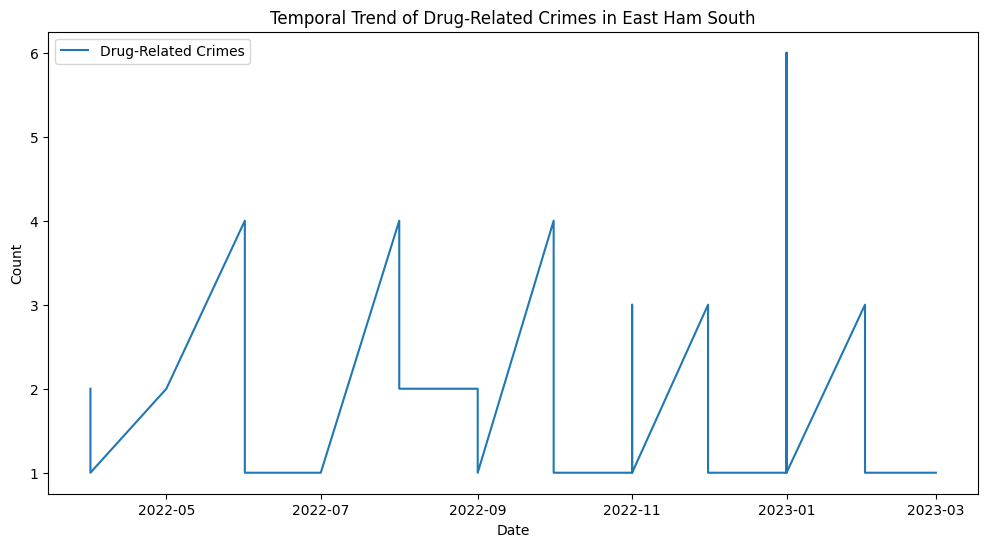


Analysis for high-risk area: Forest Gate North
Mean drug-related crimes: 1.93
Median drug-related crimes: 2.0
Standard deviation of drug-related crimes: 1.10


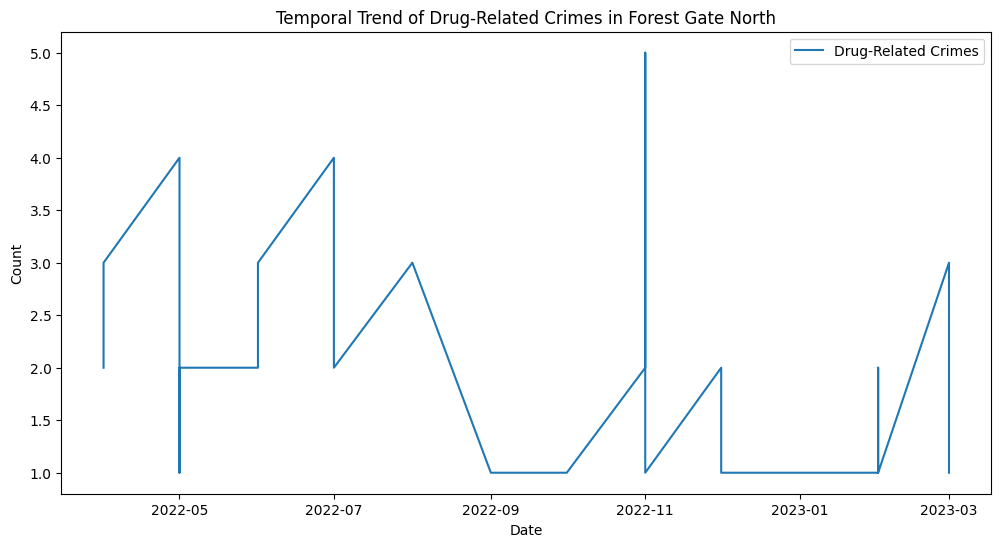


Analysis for high-risk area: Forest Gate South
Mean drug-related crimes: 2.93
Median drug-related crimes: 2.0
Standard deviation of drug-related crimes: 2.31


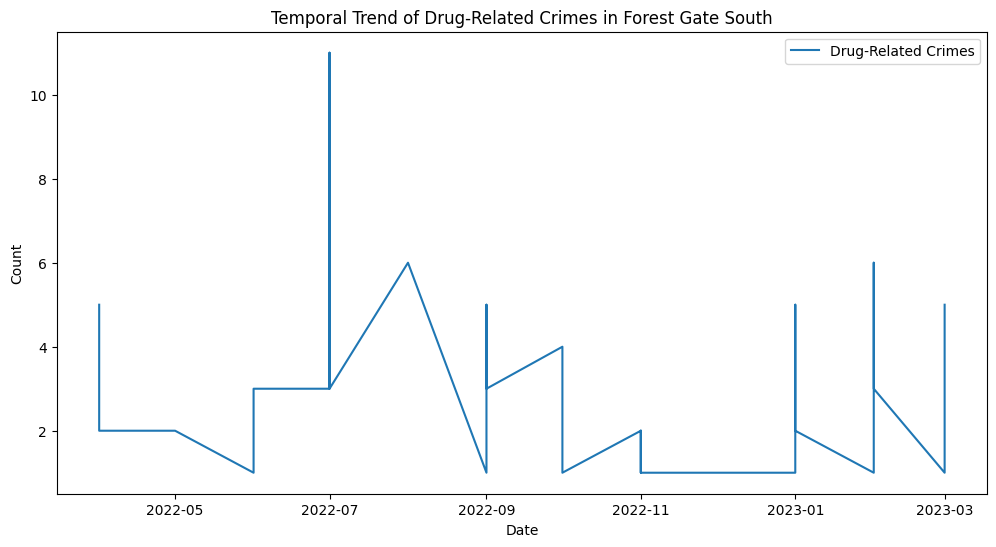


Analysis for high-risk area: Green Street West
Mean drug-related crimes: 3.36
Median drug-related crimes: 2.0
Standard deviation of drug-related crimes: 2.40


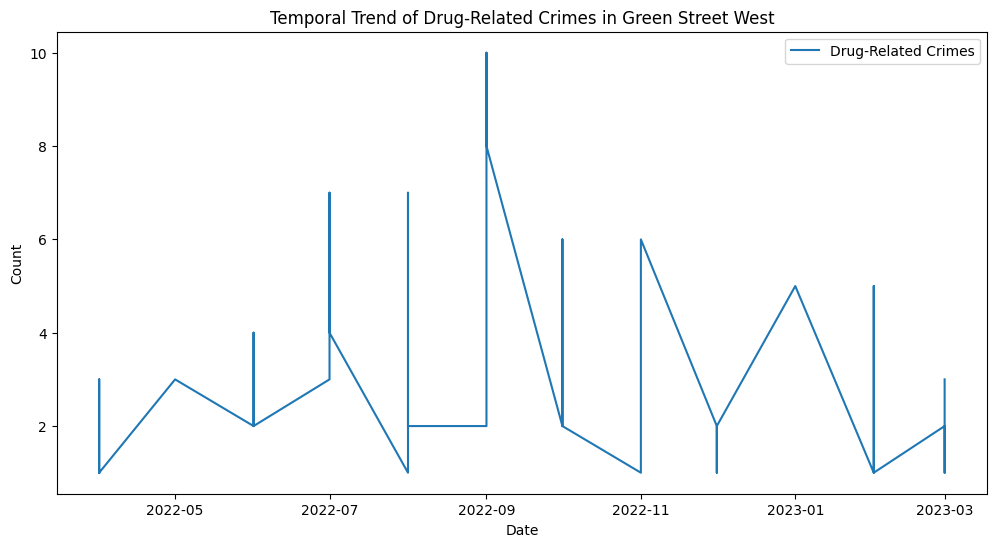


Analysis for high-risk area: Little Ilford
Mean drug-related crimes: 3.03
Median drug-related crimes: 2.0
Standard deviation of drug-related crimes: 2.63


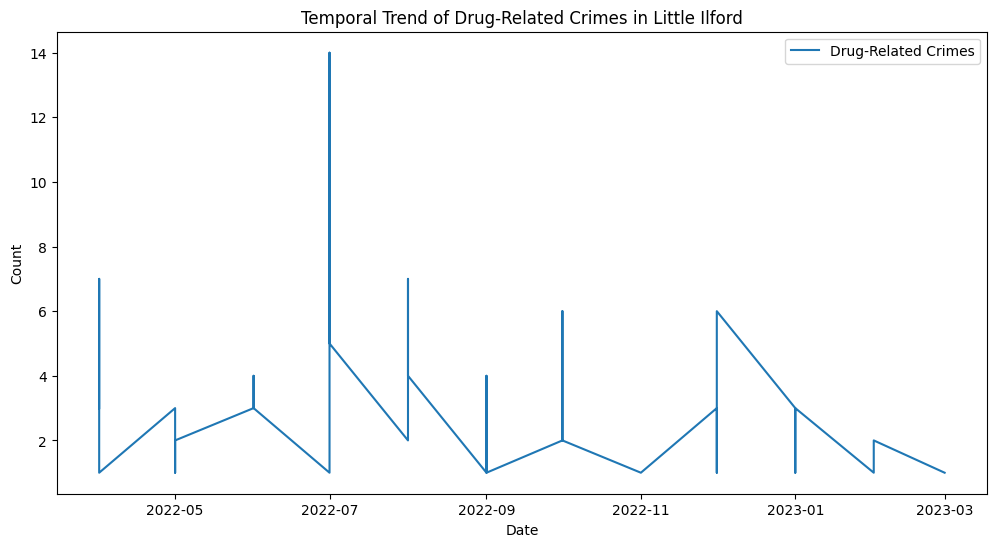


Analysis for high-risk area: Island Gardens
Mean drug-related crimes: 1.55
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 1.14


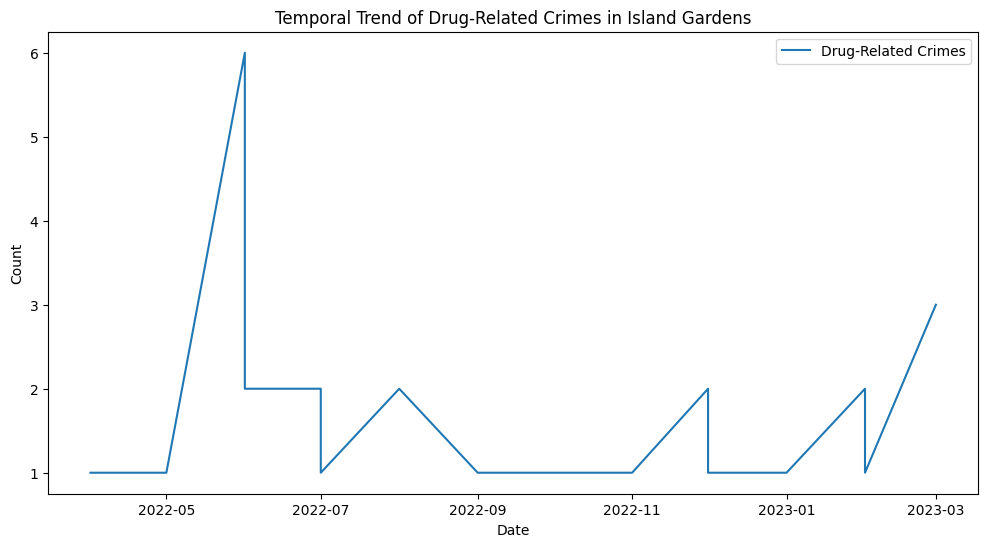


Analysis for high-risk area: Lansbury
Mean drug-related crimes: 4.96
Median drug-related crimes: 3.5
Standard deviation of drug-related crimes: 4.42


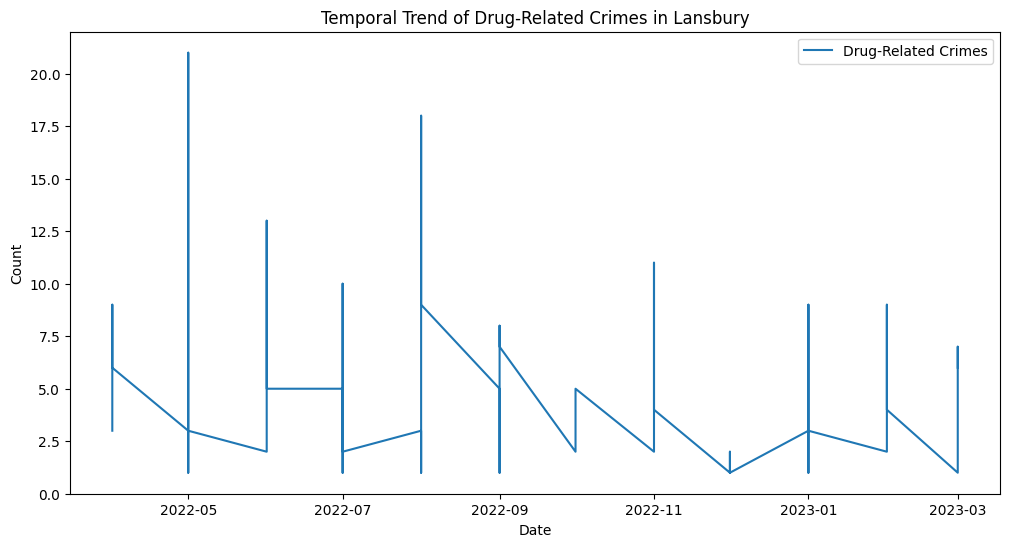


Analysis for high-risk area: Limehouse
Mean drug-related crimes: 1.48
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 0.87


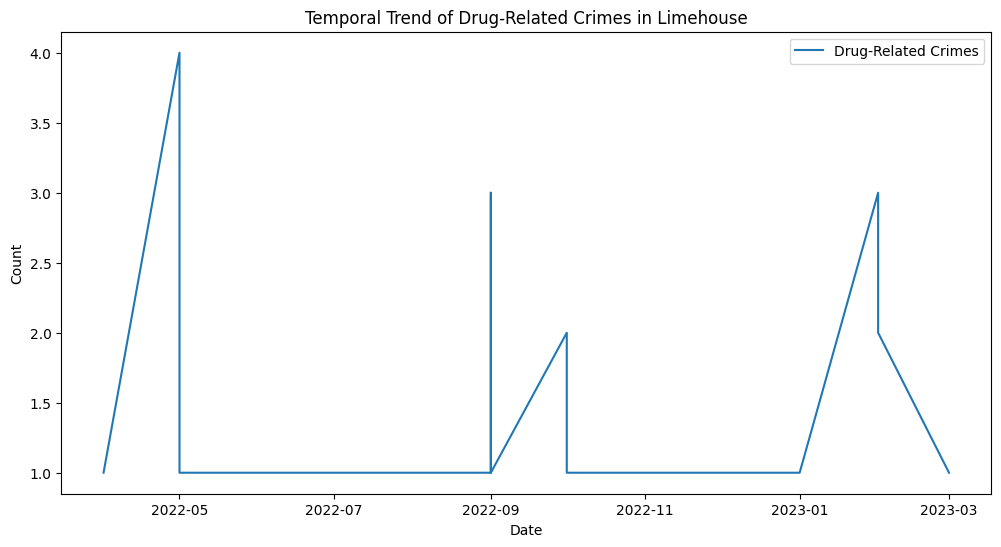


Analysis for high-risk area: Shadwell
Mean drug-related crimes: 3.62
Median drug-related crimes: 3.0
Standard deviation of drug-related crimes: 2.94


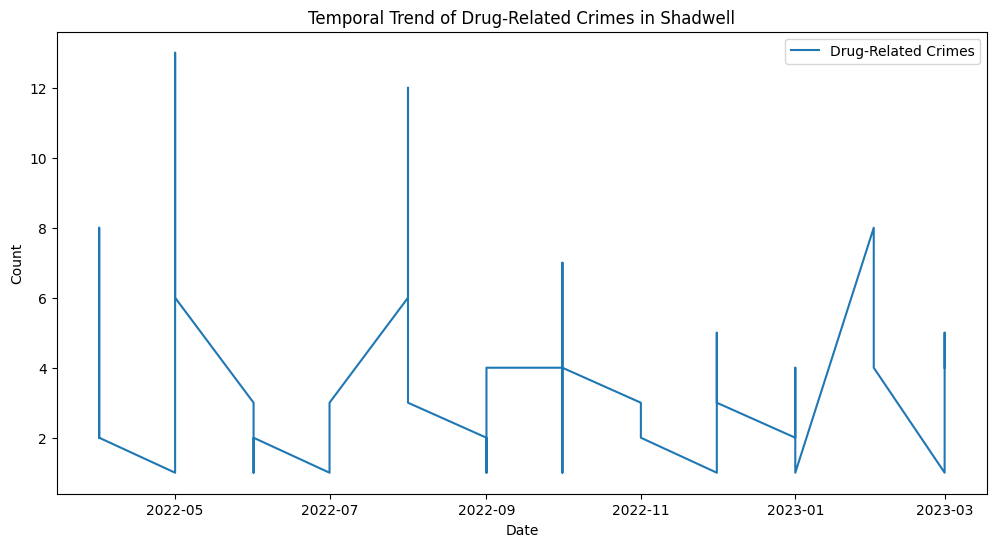


Analysis for high-risk area: Spitalfields & Banglatown
Mean drug-related crimes: 5.95
Median drug-related crimes: 4.0
Standard deviation of drug-related crimes: 6.11


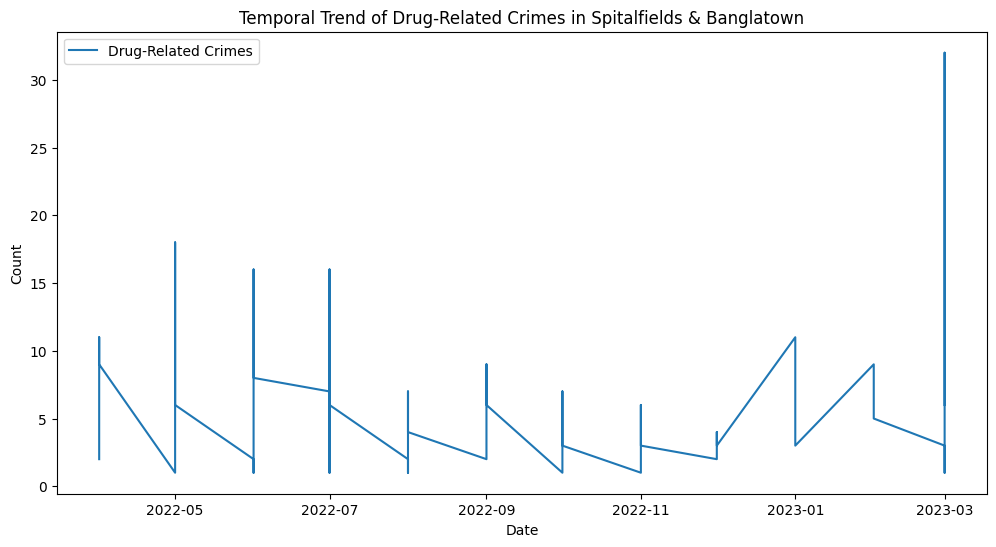


Analysis for high-risk area: St Dunstan's
Mean drug-related crimes: 3.00
Median drug-related crimes: 3.0
Standard deviation of drug-related crimes: 2.04


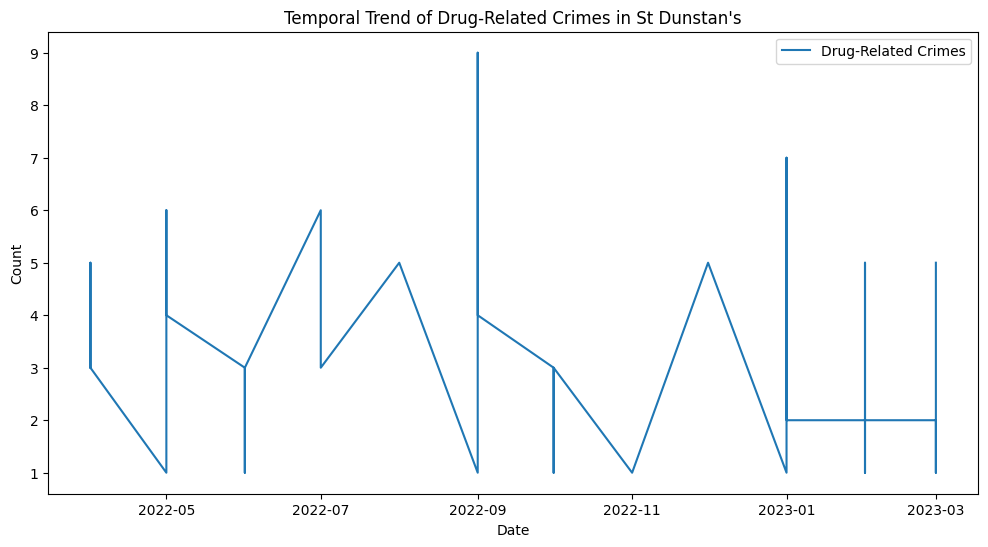


Analysis for high-risk area: St Katharine's & Wapping
Mean drug-related crimes: 1.90
Median drug-related crimes: 1.0
Standard deviation of drug-related crimes: 1.29


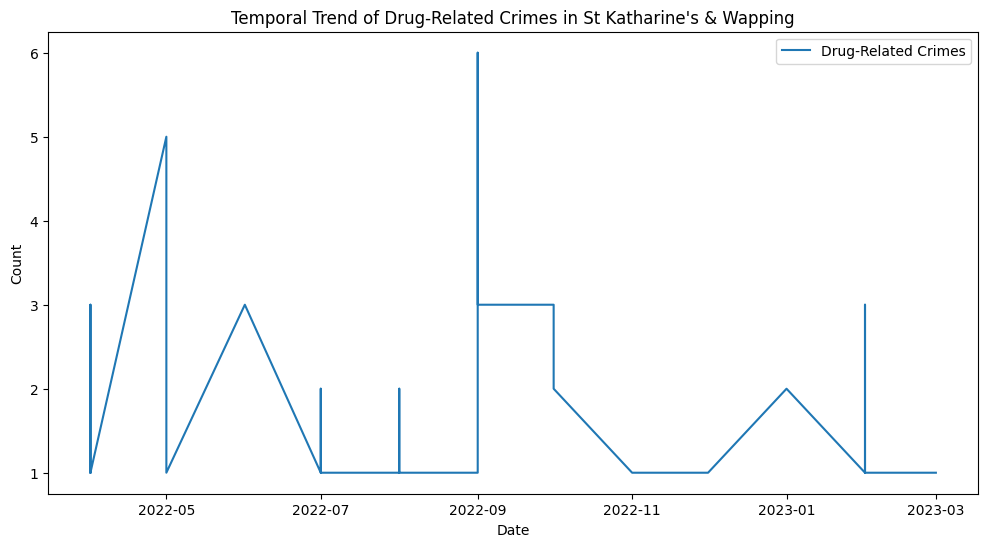


Analysis for high-risk area: St Peter's
Mean drug-related crimes: 11.05
Median drug-related crimes: 10.0
Standard deviation of drug-related crimes: 9.03


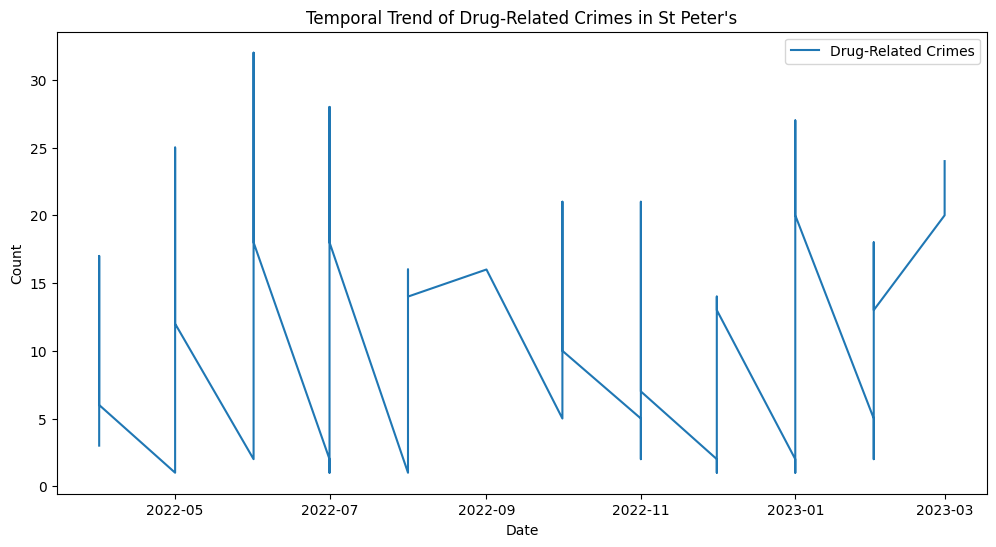


Analysis for high-risk area: Weavers
Mean drug-related crimes: 5.42
Median drug-related crimes: 5.0
Standard deviation of drug-related crimes: 3.92


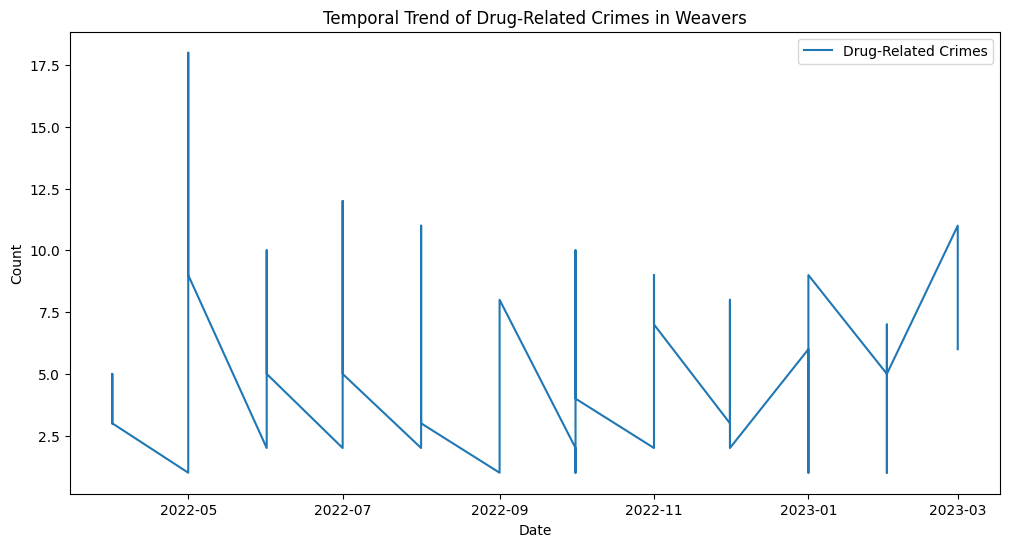

In [ ]:
# Analyze and summarize high-risk areas
for i, area_index in enumerate(valid_high_risk_areas):
    area_name = high_risk_area_names[i]
    area_data = drug_offences_data[drug_offences_data['Area name'] == area_name]

    # Display area name
    print(f'\nAnalysis for high-risk area: {area_name}')

    # Display statistics for drug-related crimes in this area
    crime_mean = area_data['Count'].mean()
    crime_median = area_data['Count'].median()
    crime_std = area_data['Count'].std()

    print(f'Mean drug-related crimes: {crime_mean:.2f}')
    print(f'Median drug-related crimes: {crime_median}')
    print(f'Standard deviation of drug-related crimes: {crime_std:.2f}')

    # Visualize temporal trend of drug-related crimes for this area
    plt.figure(figsize=(12, 6))
    plt.plot(area_data.index, area_data['Count'], label='Drug-Related Crimes')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Temporal Trend of Drug-Related Crimes in {area_name}')
    plt.legend()
    plt.show()



In [ ]:
# # Display summary statistics for high-risk areas
# for i in high_risk_areas:
#     if i < len(area_names):
#         area_name = area_names[i]
#         area_crime_counts = y_test_reshaped[i]

#         # Calculate statistics for the high-risk area
#         mean_count = np.mean(area_crime_counts)
#         median_count = np.median(area_crime_counts)
#         std_deviation = np.std(area_crime_counts)

#         print(f'\nStatistics for High-risk Area: {area_name}')
#         print(f'Mean Crime Count: {mean_count:.2f}')
#         print(f'Median Crime Count: {median_count:.2f}')
#         print(f'Standard Deviation of Crime Count: {std_deviation:.2f}')


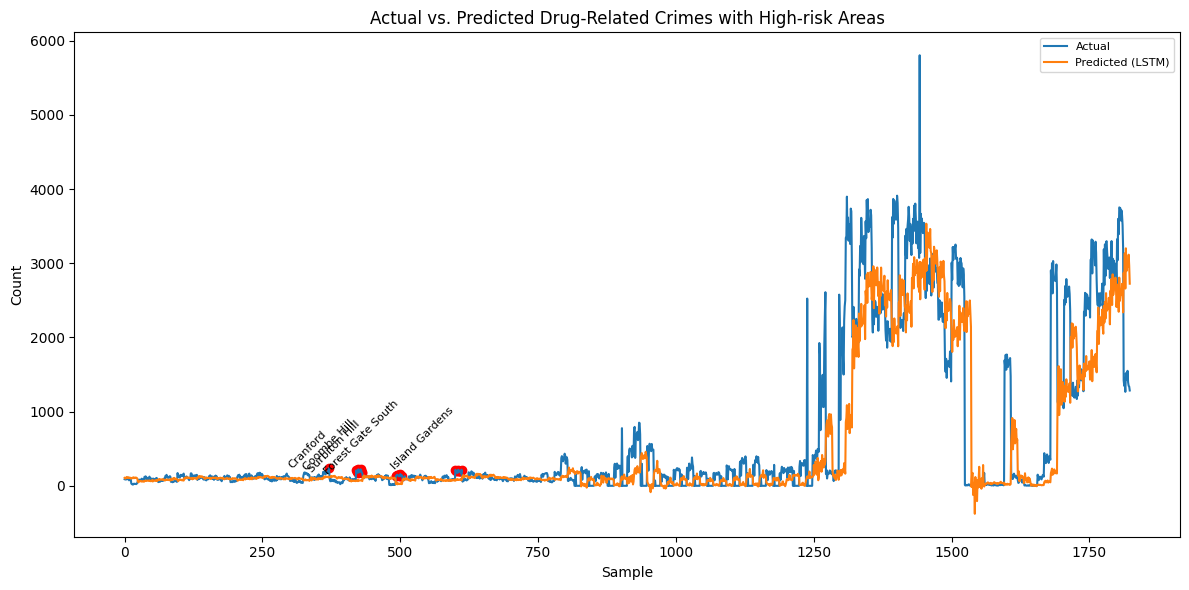

In [ ]:
# Assuming 'area_names' is a list containing the names of areas in the same order as the dataset
area_names = df.loc[df['Offence Group'] == 'Drug Offences']['Area name'].unique()

# Select a subset of area names for display (e.g., every 10th name)
displayed_area_names = area_names[::10]

# Plot the actual and predicted crime counts
plt.figure(figsize=(12, 6))
plt.plot(y_test_reshaped, label='Actual')
plt.plot(y_pred_reshaped, label='Predicted (LSTM)')

# Mark the high-risk areas and display a subset of their names on the side
for i in high_risk_areas:
    if i < len(area_names):
        plt.scatter(i, y_test_reshaped[i], color='red', label='High-risk Areas')
        if area_names[i] in displayed_area_names:
            plt.text(i, y_test_reshaped[i], f'{area_names[i]}', rotation=45, ha='right', fontsize=8)

# Display only 'Actual' and 'Predicted' in the legend
plt.legend(labels=['Actual', 'Predicted (LSTM)'], loc='upper right', fontsize=8)

plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Drug-Related Crimes with High-risk Areas')
plt.tight_layout()

plt.show()


In [ ]:
# Assuming 'forecast_arima' is defined here
forecast_arima = [10, 20, 30]

# Consider the last 3 samples of 'y_test'
y_test_last_3_samples = y_test[-3:]

# Evaluate ARIMA model for the last 3 samples
arima_mae = mean_absolute_error(y_test_last_3_samples[:, 0], forecast_arima)
arima_mse = mean_squared_error(y_test_last_3_samples[:, 0], forecast_arima)
arima_rmse = np.sqrt(arima_mse)

# Print model evaluation results
print('ARIMA Model Evaluation:')
print(f'Mean Absolute Error (ARIMA): {arima_mae:.2f}')
print(f'Mean Squared Error (ARIMA): {arima_mse:.2f}')
print(f'Root Mean Squared Error (ARIMA): {arima_rmse:.2f}\n')


# Evaluate LSTM model
lstm_mae = mean_absolute_error(y_test, y_pred)
lstm_mse = mean_squared_error(y_test, y_pred)
lstm_rmse = np.sqrt(lstm_mse)

print('LSTM Model Evaluation:')
print(f'Mean Absolute Error (LSTM): {lstm_mae:.2f}')
print(f'Mean Squared Error (LSTM): {lstm_mse:.2f}')
print(f'Root Mean Squared Error (LSTM): {lstm_rmse:.2f}\n')

print('Model Performance Comparison:')
print('ARIMA vs. LSTM')
print(f'MAE: {arima_mae:.2f} vs. {lstm_mae:.2f}')
print(f'MSE: {arima_mse:.2f} vs. {lstm_mse:.2f}')
print(f'RMSE: {arima_rmse:.2f} vs. {lstm_rmse:.2f}')



ARIMA Model Evaluation:
Mean Absolute Error (ARIMA): 2585.33
Mean Squared Error (ARIMA): 7405893.33
Root Mean Squared Error (ARIMA): 2721.38

LSTM Model Evaluation:
Mean Absolute Error (LSTM): 285.51
Mean Squared Error (LSTM): 325117.42
Root Mean Squared Error (LSTM): 570.19

Model Performance Comparison:
ARIMA vs. LSTM
MAE: 2585.33 vs. 285.51
MSE: 7405893.33 vs. 325117.42
RMSE: 2721.38 vs. 570.19


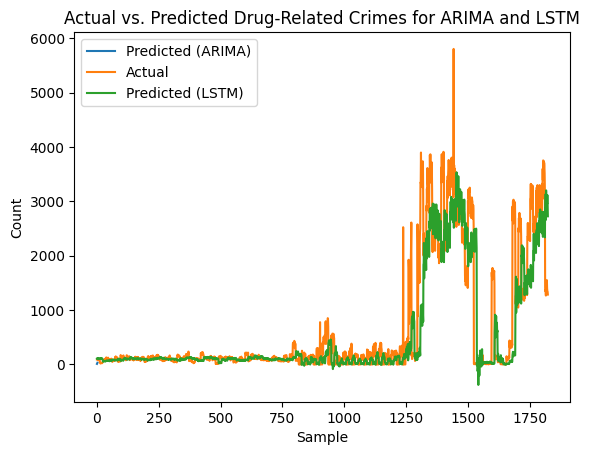

In [ ]:
# Convert 'forecast_arima' to a NumPy array for easier handling
forecast_arima = np.array(forecast_arima)

# Plot the ARIMA predictions
plt.plot(forecast_arima, label='Predicted (ARIMA)')

# Rest of the plotting code remains the same
plt.plot(y_test.flatten(), label='Actual')
plt.plot(y_pred.flatten(), label='Predicted (LSTM)')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Drug-Related Crimes for ARIMA and LSTM')
plt.show()


In [ ]:
# Create a base map
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# Add choropleth map of crime rates by borough
folium.Choropleth(
    geo_data=geojson_file,
    data=df,  # Updated DataFrame with crime data
    columns=['Area code', 'Count'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Drug-Crime Rate by Borough'
).add_to(m)

# Display the map
m.save('crime_map.html')

# Display the map in the notebook
m
